# Python para Ciência de Dados
## Análise do Desenvolvimento Humano e Econômico Global com Base no Dataset Gapminder

Técnicas utilizadas
- Separação de dados em níveis de qualidade de dados (bronze, prata, ouro): Organizando dados já processados
- Uso de backward-fill e interpolação linear: Processamento de dados ausentes


Datasets adicionais e Fontes de Dados
- Códigos ISO:
- Mortalidade Infantil:
- Emissões de CO2
- Consumo de proteína:
- Alfabetização:


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from io import StringIO
from enum import Enum

df = pd.read_csv('dados/bronze/gapminder_full.csv', sep=',')

### Descrições Iniciais do Dataset - Sem limpeza

In [14]:
df.head()

,country,year,pop,continent,lifeExp,gdpPercap
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1736 entries, 0 to 1735
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1736 non-null   object 
 1   year       1736 non-null   int64  
 2   pop        1736 non-null   float64
 3   continent  1736 non-null   object 
 4   lifeExp    1736 non-null   float64
 5   gdpPercap  1736 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 81.5+ KB


In [16]:
df.describe()

,year,pop,lifeExp,gdpPercap
count,1736.000000,1.736000e+03,1736.000000,1736.000000
mean,1979.669931,3.156800e+07,59.511979,7240.155986
std,17.296364,1.172888e+08,12.956028,9839.873695
min,1952.000000,6.001100e+04,23.599000,241.165876
25%,1967.000000,2.818694e+06,48.245000,1202.060309
50%,1982.000000,7.150606e+06,60.808000,3534.772106
75%,1997.000000,1.977102e+07,70.945000,9380.254270
max,2007.000000,1.318683e+09,82.603000,113523.132900


## Análise e limpeza dos datasets

In [17]:
size_country = df.groupby("country").size().sort_values(ascending=False)
size_country

country
France                19
Bolivia               17
Guinea                17
Ecuador               15
China                 15
                      ..
Vietnam               12
West Bank and Gaza    12
Yemen Rep.            12
Zambia                12
Zimbabwe              12
Length: 142, dtype: int64

Temos valores duplicados em nosso dataset...

In [18]:
df = df.drop_duplicates() # Estamos removendo duplicatas completas
# Verificando se há algum registro duplicado restante
duplicados_restantes = df[df.duplicated(subset=['country', 'year'], keep= False)].copy()
duplicados_restantes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    0 non-null      object 
 1   year       0 non-null      int64  
 2   pop        0 non-null      float64
 3   continent  0 non-null      object 
 4   lifeExp    0 non-null      float64
 5   gdpPercap  0 non-null      float64
dtypes: float64(3), int64(1), object(2)
memory usage: 0.0+ bytes


Foram removidos 32 registros duplicados (duplicatas completas)... Não há mais nenhum registro duplicado restante

Agora queremos verificar se os registros por ano estão distribuídos uniformente

In [19]:
df_analise_agrupamento_anoxpais = df.sort_values(["country", "year"])
df_analise_agrupamento_anoxpais["diff_ano"] = df.groupby("country")["year"].diff().fillna(0).astype(int)
df_analise_agrupamento_anoxpais

,country,year,pop,continent,lifeExp,gdpPercap,diff_ano
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,0
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,5
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,5
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,5
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,5
...,...,...,...,...,...,...,...
1731,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,5
1732,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,5
1733,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,5
1734,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,5


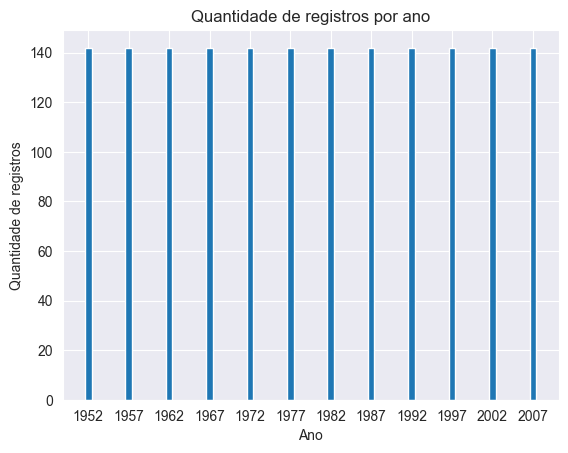

In [20]:
count_por_ano = df_analise_agrupamento_anoxpais.groupby("year").size().reset_index(name="total")
plt.figure()
plt.bar(count_por_ano["year"], count_por_ano["total"])
plt.xlabel("Ano")
plt.ylabel("Quantidade de registros")
plt.title("Quantidade de registros por ano")
plt.xticks(count_por_ano["year"])
plt.show()

Os registros estão distribuídos uniformemente com registros a cada 5 anos... 

Verificando existência de dados ausentes

In [21]:
df.isnull().sum()

country      0
year         0
pop          0
continent    0
lifeExp      0
gdpPercap    0
dtype: int64

Não há nenhum dado ausente em nosso data set - vamos salvar uma versão limpa dos dados

In [22]:
df.to_csv("dados/prata/gapminder_dataset_limpo.csv", sep='|', encoding='utf-8')

## Criando novas colunas - derivando dados

In [23]:
df["gdp_total"] = df["pop"] * df["gdpPercap"]
df["gdp_total_bn"] = df["gdp_total"] / 1_000_000_000
df["pop_mn"] = df["pop"] / 1_000_000
df

,country,year,pop,continent,lifeExp,gdpPercap,gdp_total,gdp_total_bn,pop_mn
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09,6.567086,8.425333
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09,7.585449,9.240934
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09,8.758856,10.267083
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09,9.648014,11.537966
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09,9.678553,13.079460
...,...,...,...,...,...,...,...,...,...
1731,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09,6.508241,9.216418
1732,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09,7.422612,10.704340
1733,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09,9.037851,11.404948
1734,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09,8.015111,11.926563


## Obtendo dados de fontes externas

### Definição de funções

In [24]:
def load_csv_columns(url, path, columns):
    response = requests.get(url)
    response.raise_for_status()
    result = pd.read_csv(StringIO(response.text))
    _result = result[columns].reset_index(drop=True)
    result.to_csv(path, sep=';', encoding='utf-8', index=False)
    return _result

def preencher_dataframe_por_backward_fill(dataframe, coluna):
    pass

def preencher_dataframe_por_interpolacao_linear(dataframe):
    dataframe = dataframe.sort_values("year")
    anos_completos = pd.DataFrame({
        "year": range(dataframe["year"].min(), dataframe["year"].max() + 1)
    })
    dataframe = anos_completos.merge(dataframe, on="year", how="left")
    dataframe["country"] = dataframe["country"].ffill().bfill()
    dataframe["child_mortality"] = (
        dataframe["child_mortality"]
        .interpolate(method="linear")
        .bfill()
    )
    return dataframe  

### Código ISO dos Países (Chave Primária para outros datasets)

In [25]:
iso_countries = load_csv_columns(
    "https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv", 
    "dados/bronze/contry_iso_codes.csv", 
    ["COUNTRY", "CODE"]
)

iso_countries = iso_countries.rename(columns={
    "COUNTRY": "country",
    "CODE": "code"
})

iso_countries

,country,code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND
...,...,...
217,Virgin Islands,VGB
218,West Bank,WBG
219,Yemen,YEM
220,Zambia,ZMB


### ETL de dados de mortalidade infantil

In [26]:
child_mortality = load_csv_columns(
    "https://raw.githubusercontent.com/owid/owid-datasets/6155d4ca1ea14ef30e753010a25521eeb416e8a2/datasets/Child%20mortality%20-%20Gapminder%20(2013)/Child%20mortality%20-%20Gapminder%20(2013).csv",
    "dados/bronze/child_mortality.csv",
    ["Entity", "Year", "Child mortality (Gapminder (2013))"]
)

child_mortality = child_mortality.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Child mortality (Gapminder (2013))" : "child_mortality"
})

child_mortality = preencher_dataframe_por_interpolacao_linear(child_mortality).sort_values(by=['country', 'year'])

child_mortality = (
    child_mortality
    .groupby("country", group_keys=False)
    .apply(preencher_dataframe_por_interpolacao_linear)
    .sort_values(["country", "year"])
    .reset_index(drop=True)
)

child_mortality.to_csv("dados/prata/child_mortality.csv", sep=';', encoding='utf-8', index=False)

C:\Users\Felipe\AppData\Local\Temp\ipykernel_25336\2061805745.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(preencher_dataframe_por_interpolacao_linear)


### ETL de Share de Emissões de CO2

In [27]:
co2_share = load_csv_columns(
    "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Cumulative%20CO2%20emissions%20share%20(OWID%20based%20on%20GCP%2C%202017)/Cumulative%20CO2%20emissions%20share%20(OWID%20based%20on%20GCP%2C%202017).csv",
    "dados/bronze/co2_emissions.csv",
    ["Entity", "Year", "Cumulative CO2 emissions share (OWID based on GCP, 2017)"]
)

co2_share = co2_share.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Cumulative CO2 emissions share (OWID based on GCP, 2017)" : "co2_share"
})

co2_share.to_csv("dados/prata/co2_emissions.csv", sep=';', encoding='utf-8', index=False)

### ETL de Consumo de Proteína

In [28]:
protein_consumption = load_csv_columns(
   "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Daily%20protein%20supply%20-%20FAO%20(2017)/Daily%20protein%20supply%20-%20FAO%20(2017).csv",
    "dados/bronze/protein_consumption.csv",
    ["Entity", "Year", "Daily protein supply (FAO (2017))", "Daily protein supply of animal origin (FAO (2017))", "Daily protein supply of plant origin (FAO (2017))", "Share of protein of animal origin (FAO (2017))", "Share of protein of plant origin (FAO (2017))"]
)

protein_consumption = protein_consumption.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Daily protein supply (FAO (2017))" : "daily_protein_consumption"
})

### ETL de Alfabetização

In [46]:
literacy = load_csv_columns(
    "https://raw.githubusercontent.com/owid/owid-datasets/refs/heads/master/datasets/Cross-country%20literacy%20rates%20-%20World%20Bank%2C%20CIA%20World%20Factbook%2C%20and%20other%20sources/Cross-country%20literacy%20rates%20-%20World%20Bank%2C%20CIA%20World%20Factbook%2C%20and%20other%20sources.csv",
    "dados/bronze/literacy_rate.csv",
    ["Entity", "Year", "Literacy rates (World Bank, CIA World Factbook, and other sources)"]
)

literacy = literacy.rename(columns={
    "Entity" : "country",
    "Year" : "year",
    "Literacy rates (World Bank, CIA World Factbook, and other sources)" : "literacy_rate"
})

literacy

,country,year,literacy_rate
0,Afghanistan,1979,18.157681
1,Afghanistan,2011,31.741119
2,Afghanistan,2015,38.168041
3,Albania,2001,98.712982
4,Albania,2008,95.938637
...,...,...,...
1418,Zambia,2015,85.117264
1419,Zimbabwe,1982,77.794167
1420,Zimbabwe,1992,83.512581
1421,Zimbabwe,2011,83.582710


### Merge dos dados e persistência

In [45]:
df_code = df.merge(iso_countries[["code", "country"]], on=["country"], how="left")
df_cm = df_code.merge(child_mortality[["child_mortality", "year", "country"]], on=["country", "year"], how="left")
df_cm = df_cm.merge(co2_share[["co2_share", "year", "country"]], on=["country", "year"], how="left")
df_cm = df_cm.merge(protein_consumption[["daily_protein_consumption", "year", "country"]], on=["country", "year"], how="left")
df_cm = df_cm.merge(literacy[["literacy_rate", "year", "country"]], on=["country", "year"], how="left")
df_cm.to_csv("dados/ouro/dados_consolidados.csv", sep=';', encoding='utf-8', index=False)
df_cm

,country,year,pop,continent,lifeExp,gdpPercap,gdp_total,gdp_total_bn,pop_mn,code,child_mortality,co2_share,daily_protein_consumption,literacy_rate
0,Afghanistan,1952,8425333.0,Asia,28.801,779.445314,6.567086e+09,6.567086,8.425333,AFG,422.433333,0.0001,NaN,NaN
1,Afghanistan,1957,9240934.0,Asia,30.332,820.853030,7.585449e+09,7.585449,9.240934,AFG,376.100000,0.0004,NaN,NaN
2,Afghanistan,1962,10267083.0,Asia,31.997,853.100710,8.758856e+09,8.758856,10.267083,AFG,348.600000,0.0011,82.98,NaN
3,Afghanistan,1967,11537966.0,Asia,34.020,836.197138,9.648014e+09,9.648014,11.537966,AFG,323.700000,0.0022,85.25,NaN
4,Afghanistan,1972,13079460.0,Asia,36.088,739.981106,9.678553e+09,9.678553,13.079460,AFG,299.000000,0.0034,75.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,1987,9216418.0,Africa,62.351,706.157306,6.508241e+09,6.508241,9.216418,ZWE,74.000000,0.0450,50.24,NaN
1700,Zimbabwe,1992,10704340.0,Africa,60.377,693.420786,7.422612e+09,7.422612,10.704340,ZWE,81.600000,0.0486,49.10,83.512581
1701,Zimbabwe,1997,11404948.0,Africa,46.809,792.449960,9.037851e+09,9.037851,11.404948,ZWE,100.700000,0.0509,46.92,NaN
1702,Zimbabwe,2002,11926563.0,Africa,39.989,672.038623,8.015111e+09,8.015111,11.926563,ZWE,100.300000,0.0514,46.66,NaN


### Modularização dos gráficos

In [43]:
def grafico_barras_horizontais(dataframe, eixo_x, eixo_y, titulo):
    plt.figure(figsize=(10, 6))
    sns.barplot(data=dataframe, x=eixo_x, y=eixo_y)
    plt.title(titulo)
    plt.xlim(70, 90) # Foca na parte superior da escala
    plt.show()

def grafico_linha_marcadores(dataframe, eixo_x, eixo_y, titulo, label_y = ""):
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=dataframe, x=eixo_x, y=eixo_y, marker='o')
    plt.title(titulo)
    plt.ylabel(label_y)
    plt.show()

def grafico_boxplot(dataframe, eixo_x, eixo_y, titulo):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=dataframe, x=eixo_x, y=eixo_y)
    plt.title(titulo)
    plt.show()

def grafico_barras_correlacao(dataframe, alvo, metodo="pearson"):
    df_num = dataframe.select_dtypes(include="number")
    corr = df_num.corr(method=metodo)
    if alvo:
        corr[alvo].sort_values().plot.barh(figsize=(6, 4))
        plt.title(f"Correlação com {alvo}")
        plt.xlabel("Correlação")
        plt.tight_layout()
        plt.show()
        return
    plt.figure(figsize=(8, 6))
    plt.imshow(corr)
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title("Matriz de Correlação")
    plt.tight_layout()
    plt.show()

def grafico_matriz_correlacao(dataframe, metodo="pearson"):
    df_num = dataframe.select_dtypes(include="number")
    corr = df_num.corr(method=metodo)
    plt.figure(figsize=(8, 6))
    plt.imshow(corr)
    plt.colorbar(label="Correlação")
    plt.xticks(range(len(corr)), corr.columns, rotation=90)
    plt.yticks(range(len(corr)), corr.columns)
    plt.title(f"Matriz de Correlação ({metodo})")
    plt.tight_layout()
    plt.show()

### Modularização de Filtros

In [32]:
def filtrar_por_ano(dataframe, ano):
    return dataframe[dataframe['year'] == ano].copy()

def filtrar_por_periodo(dataframe, ano_inicio, ano_fim):
    return dataframe[(dataframe["year"] >= ano_inicio) & (dataframe["year"] <= ano_fim)].copy()

def filtrar_por_continente(dataframe, continente):
    return dataframe[dataframe['continent'] == continente].copy()

def filtrar_por_iso_code(dataframe, iso_code):
    return dataframe[dataframe['code'] == iso_code].copy()

def filtrar_por_paises(df, paises):
    return df[df["country"].isin(paises)].copy()

class Continente(Enum):
    ASIA = "Asia"
    AFRICA = "Africa"
    EUROPA = "Europe"
    AMERICA = "Americas"
    OCEANIA = "Oceania"


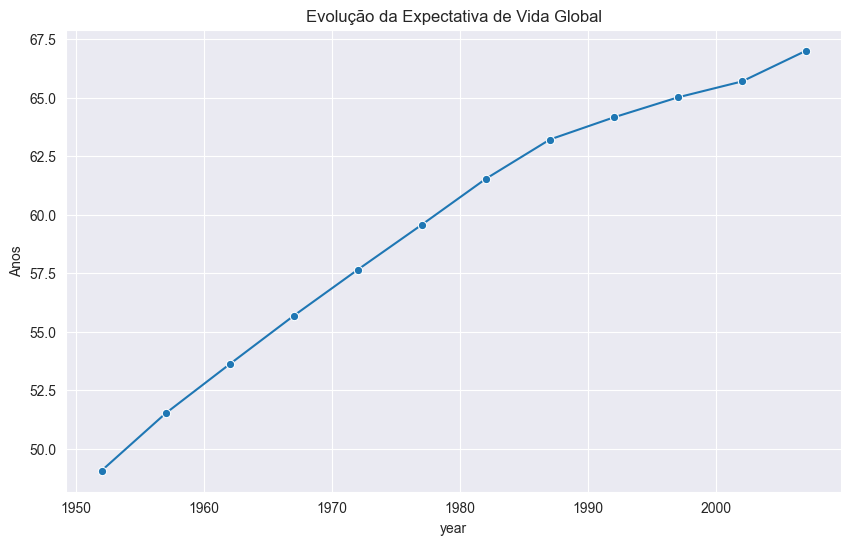

In [33]:
media_ano = df.groupby('year')['lifeExp'].mean().reset_index()
#media_ano = filtrar_por_continente(df_cm, Continente.OCEANIA.value)
#media_ano = filtrar_por_iso_code(df_cm, "USA")
grafico_linha_marcadores(media_ano, 'year', 'lifeExp', 'Evolução da Expectativa de Vida Global', 'Anos')

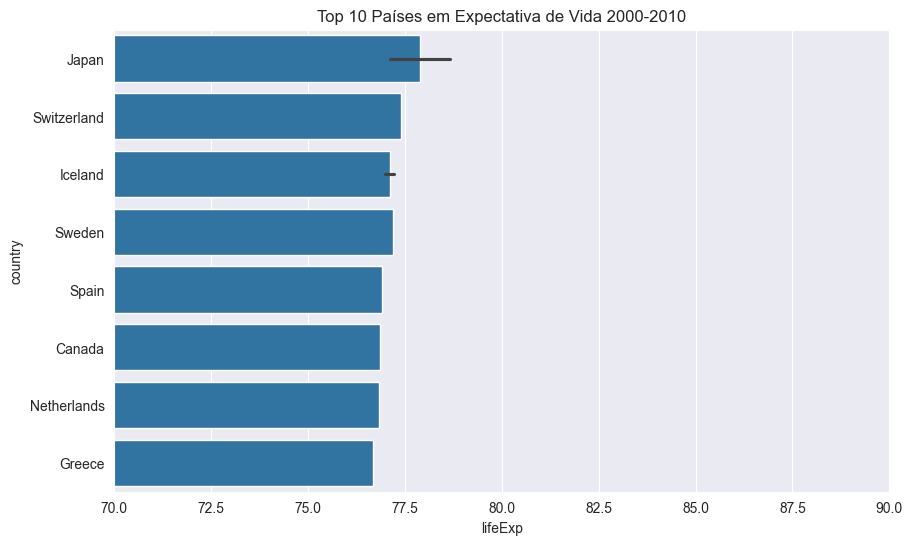

In [34]:
df_ano = filtrar_por_periodo(df_cm, 1980, 1990)
top10 = df_ano.nlargest(10, 'lifeExp')
grafico_barras_horizontais(top10, 'lifeExp', 'country', 'Top 10 Países em Expectativa de Vida 2000-2010')

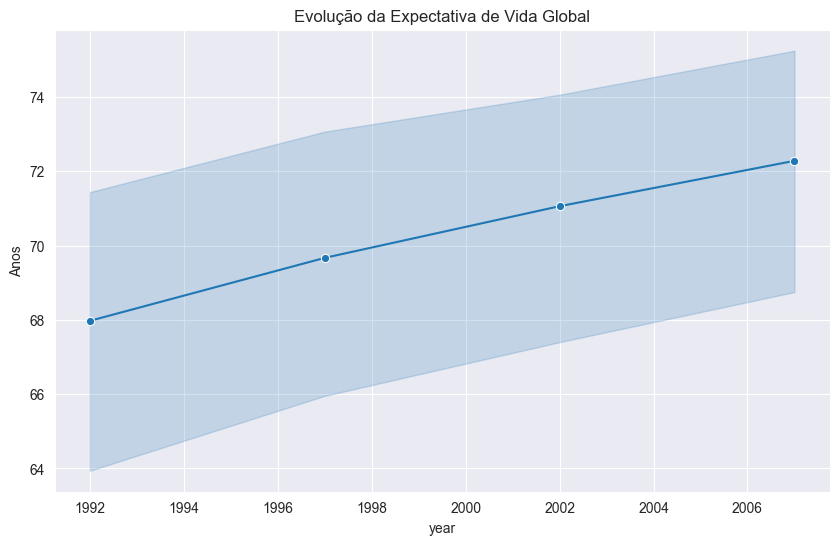

In [35]:
paises = ["Brazil", "Argentina", "Paraguay", "Uruguay", "Bolivia"]
df_filtrado = filtrar_por_paises(df_cm, paises)
df_filtrado = filtrar_por_periodo(df_filtrado, 1990, 2010)
grafico_linha_marcadores(df_filtrado, 'year', 'lifeExp', 'Evolução da Expectativa de Vida no Mercosul 1990-', 'Anos')

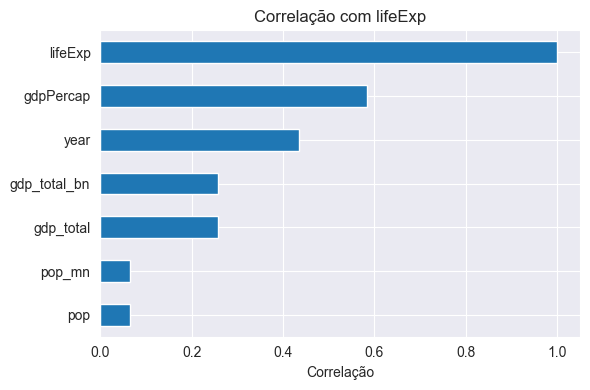

In [40]:
grafico_barras_correlacao(df, alvo="lifeExp")

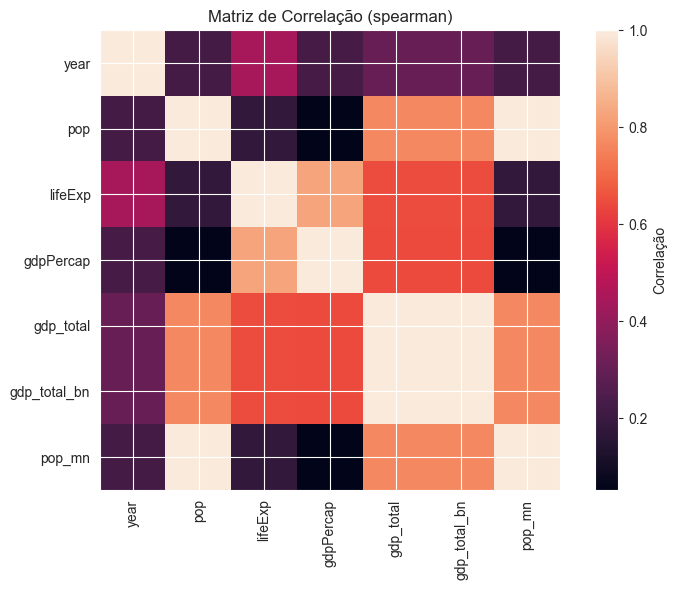

In [44]:
grafico_matriz_correlacao(df, metodo="spearman")

# Opções - Mundial

- Fazer a linha média mundial de alguma coisa e a linha média por país
- Países com maior crescimento de expectativa de vida no periodo (Por década)
- Países com maior decrescimo de expectativa de vida no periodo (Por década)
- Análise de Tendência de expectativa de vida mundial
- Análise por continente
- Top 10


# Brasil
- Análise de tendência de expectativa de vida (Precisa complementar os dados)
- Análise de tentência de crescimento de PIB (Precisa complementar os dados)
- Correlação entre crescimento do emprego com a expectativa de vida

- derivar variaveis

Dimensões:
- Mundial
- Por continente
- Brasil
- Mercosul

Desenvolvimento:
- Humano
- Economico-Tecnológico